# Flipped Counties

In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bokeh.io import show
from bokeh.models import LogColorMapper, ColorBar, LogTicker
from bokeh.palettes import Viridis6 as palette
from bokeh.palettes import Greys, BuGn
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, CategoricalColorMapper, LinearColorMapper
from bokeh.sampledata.us_counties import data as counties


## Data Upload

In [394]:
#load in data
data = pd.read_csv(r'census_data/Merged_Dataset.csv')
data[data['county']=='WORTH COUNTY']

,year,state,state_po,county,dem,gop,total,POPESTIMATE,POPEST_MALE,POPEST_FEM,...,bq_speak_spanish_at_home,bq_speak_spanish_at_home_low_english,bq_pop_15_and_over,bq_pop_never_married,bq_pop_now_married,bq_pop_separated,bq_pop_widowed,bq_pop_divorced,bq_male_60_to_61,bq_male_62_to_64
240,2012,Georgia,GA,WORTH COUNTY,2487,5869,8419,21349,10316,11033,...,364.0,105.0,17381.0,4785.0,8544.0,597.0,1230.0,2148.0,NaN,NaN
891,2016,Georgia,GA,WORTH COUNTY,2020,6152,8295,20703,9984,10719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1614,2020,Georgia,GA,WORTH COUNTY,2395,6830,9285,20247,9707,10540,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,407.0,306.0


In [310]:
#focus only on vote columns
explore = data.iloc[:,0:7]

In [389]:
#sort values so all years in same order
explore = explore.sort_values(['year','state','county'])
explore

,year,state,state_po,county,dem,gop,total,win_by_count,win_margin_percent,party_won,p_state
0,2012,Arizona,AZ,APACHE COUNTY,17147,8250,25848,8897,34.420458,Dem,1.124191
1,2012,Arizona,AZ,COCHISE COUNTY,18546,29497,49003,-10951,22.347611,Rep,2.131256
2,2012,Arizona,AZ,COCONINO COUNTY,29257,21220,51731,8037,15.536139,Dem,2.249904
3,2012,Arizona,AZ,GILA COUNTY,7697,13455,21528,-5758,26.746563,Rep,0.936304
4,2012,Arizona,AZ,GRAHAM COUNTY,3609,8076,11855,-4467,37.680304,Rep,0.515602
...,...,...,...,...,...,...,...,...,...,...,...
1369,2020,Wisconsin,WI,WAUKESHA COUNTY,103867,159633,267159,-55766,20.873712,Rep,8.103954
1370,2020,Wisconsin,WI,WAUPACA COUNTY,9699,18948,29087,-9249,31.797710,Rep,0.882320
1371,2020,Wisconsin,WI,WAUSHARA COUNTY,4388,9016,13564,-4628,34.119729,Rep,0.411448
1372,2020,Wisconsin,WI,WINNEBAGO COUNTY,44060,47795,94032,-3735,3.972052,Rep,2.852350


In [312]:
#Check same number of counties in each year.
total_counties = data.groupby(['state_po','year'])['county'].count()
total_counties

state_po  year
AZ        2012     15
          2016     15
          2020     15
FL        2012     67
          2016     67
          2020     67
GA        2012    159
          2016    159
          2020    159
MI        2012     83
          2016     83
          2020     83
NC        2012    100
          2016    100
          2020    100
OH        2012     88
          2016     88
          2020     88
PA        2012     67
          2016     67
          2020     67
WI        2012     72
          2016     72
          2020     72
Name: county, dtype: int64

## Victory Margin Exploration

In [313]:
# calculated vote margin dem-gop, margin of victory as % of total votes in county, winning party
explore['win_by_count'] = explore['dem']-explore['gop']
explore['win_margin_percent'] = abs(explore['win_by_count']/explore['total'])*100
explore['party_won'] = ['Rep' if int(x)<0 else 'Dem' for x in explore['win_by_count']]

In [314]:
explore.sort_values(['state','win_margin_percent'])

,year,state,state_po,county,dem,gop,total,win_by_count,win_margin_percent,party_won
665,2016,Arizona,AZ,YUMA COUNTY,24605,25165,53010,-560,1.056404,Rep
1381,2020,Arizona,AZ,MARICOPA COUNTY,1040774,995665,2068144,45109,2.181134,Dem
658,2016,Arizona,AZ,MARICOPA COUNTY,702907,747361,1567834,-44454,2.835377,Rep
1388,2020,Arizona,AZ,YUMA COUNTY,32210,36534,69881,-4324,6.187662,Rep
10,2012,Arizona,AZ,PIMA COUNTY,201251,174779,382250,26472,6.925311,Dem
...,...,...,...,...,...,...,...,...,...,...
1242,2016,Wisconsin,WI,DANE COUNTY,217526,71279,310017,146247,47.173865,Dem
1314,2020,Wisconsin,WI,DANE COUNTY,260157,78789,344745,181368,52.609320,Dem
1269,2016,Wisconsin,WI,MENOMINEE COUNTY,1003,269,1279,734,57.388585,Dem
1341,2020,Wisconsin,WI,MENOMINEE COUNTY,1303,278,1585,1025,64.668770,Dem


In [396]:
#mean, min, max margins of victory in each state per year
by_county_margins = explore.groupby(['state','year']).agg({'win_margin_percent':['mean','min','max']})

In [395]:
#total state margin of votes
by_state_margins = explore.groupby(['state','year'],as_index=False).agg({'total':sum, 'win_by_count':sum})
by_state_margins['state_margin'] = (abs(by_state_margins['win_by_count'])/by_state_margins['total'])*100


In [421]:
state_party = pd.DataFrame(explore.groupby(['state','year'], as_index=False)[['dem', 'gop','total']].sum())
state_party['party_won']=state_party.dem>state_party.gop
state_party['party_won']=['Dem' if x else 'Rep' for x in state_party.party_won]
state_party.groupby(['year','party_won']).count()

state  dem  gop  total
year party_won                        
2012 Dem            5    5    5      5
     Rep            3    3    3      3
2016 Rep            8    8    8      8
2020 Dem            5    5    5      5
     Rep            3    3    3      3

### Notes about table above + past election research

States that flipped 2016 - 2020:
- Arizona (11 EV) : 1st time blue since 1996
- Georgia (16 EV): 1st time blue since 1992
- Michigan (16 EV): only red in 2016 (otherwise blue from at least 1992 - 2020)
- Pennslyvannia (20 EV): only red in 2016 (otherwise blue from at least 1992 - 2020)
- Wisconsin (10EV): only red in 2016 (otherwise blue from at least 1992 - 2020)

Other states
- Florida (29 EV): blue in 2008, (2000 red possibly by supreme court decision, controversy and debate on if recount would have mattered in outcome), 1996
- North Carolina (15 EV): blue only in 2008
- Ohio (18 EV): blue in 2008, 1996, 1992



## Margin of Victory Distributions

In [317]:
df_state=explore[explore.state=='Georgia']
df_dem = df_state[df_state.party_won =='Dem']
df_gop = df_state[df_state.party_won =='Rep']

df_gop

,year,state,state_po,county,dem,gop,total,win_by_count,win_margin_percent,party_won
82,2012,Georgia,GA,APPLING COUNTY,1758,5233,7086,-3475,49.040361,Rep
83,2012,Georgia,GA,ATKINSON COUNTY,930,1938,2902,-1008,34.734666,Rep
84,2012,Georgia,GA,BACON COUNTY,791,3093,3931,-2302,58.560163,Rep
87,2012,Georgia,GA,BANKS COUNTY,780,5354,6195,-4574,73.833737,Rep
88,2012,Georgia,GA,BARROW COUNTY,6028,18725,25199,-12697,50.386920,Rep
...,...,...,...,...,...,...,...,...,...,...
1610,2020,Georgia,GA,WHITFIELD COUNTY,10670,25636,36746,-14966,40.728243,Rep
1611,2020,Georgia,GA,WILCOX COUNTY,862,2403,3281,-1541,46.967388,Rep
1612,2020,Georgia,GA,WILKES COUNTY,2160,2823,5029,-663,13.183535,Rep
1613,2020,Georgia,GA,WILKINSON COUNTY,2075,2664,4770,-589,12.348008,Rep


In [318]:
# Ridgeplots distribution of county margin of victory split by party and by year
import colorcet as cc
from scipy.stats.kde import gaussian_kde
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter, Div
from bokeh.layouts import row, column

def ridge(category, data, scale=20):
    return list(zip([category]*len(data), scale*data))

cats = list(['2012','2016','2020'])

palette = [cc.rainbow[i*15] for i in range(17)]

x = np.linspace(-20,110, 500)

source = ColumnDataSource(data=dict(x=x))

p1 = figure(y_range=cats, 
            plot_width=900, 
            x_range=(-5, 105), 
            toolbar_location=None, 
            title ='Margin of Victory in Democratic Won Counties')

for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde(df_dem[df_dem['year']==int(cat)]['win_margin_percent'])
    y = ridge(cat, pdf(x))
    source.add(y, cat)
    p1.patch('x', cat, color=palette[i], alpha=0.6, line_color="black", source=source)

p1.outline_line_color = None
p1.background_fill_color = "#efefef"

p1.xaxis.ticker = FixedTicker(ticks=list(range(0, 101, 10)))
p1.xaxis.formatter = PrintfTickFormatter(format="%d%%")

p1.ygrid.grid_line_color = None
p1.xgrid.grid_line_color = "#dddddd"
p1.xgrid.ticker = p1.xaxis.ticker

p1.axis.minor_tick_line_color = None
p1.axis.major_tick_line_color = None
p1.axis.axis_line_color = None

p1.y_range.range_padding = 0.12

x2 = np.linspace(-20,110, 500)
source2 = ColumnDataSource(data=dict(x=x2))
p2 = figure(y_range=cats, 
            plot_width=900, 
            x_range=(-5, 105), 
            toolbar_location=None,
            title ='Margin of Victory in Republican Won Counties'
           )

for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde(df_gop[df_gop['year']==int(cat)]['win_margin_percent'])
    y = ridge(cat, pdf(x))
    source2.add(y, cat)
    p2.patch('x', cat, color=palette[i], alpha=0.6, line_color="black", source=source2)

p2.outline_line_color = None
p1.background_fill_color = "#efefef"

p2.xaxis.ticker = FixedTicker(ticks=list(range(0, 101, 10)))
p2.xaxis.formatter = PrintfTickFormatter(format="%d%%")

p2.ygrid.grid_line_color = None
p2.xgrid.grid_line_color = "#dddddd"
p2.xgrid.ticker = p2.xaxis.ticker

p2.axis.minor_tick_line_color = None
p2.axis.major_tick_line_color = None
p2.axis.axis_line_color = None

p2.y_range.range_padding = 0.12

show(column(Div(text='Georgia Presidential Elections'),row(p1,p2)))

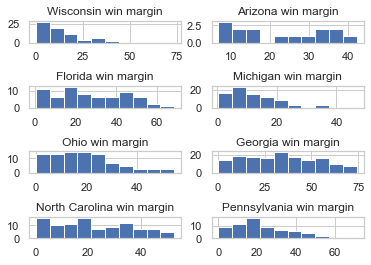

In [319]:
#historgrams of margins of victories in counties by state 2012
fig, ax = plt.subplots(4,2)
i = 0
j = 0 
for state in set(explore['state']):
    if j == 2:
        j = 0
        i +=1
    state_df = explore[(explore['state']==state)&(explore['year']==2012)]
    ax[i][j].hist(state_df['win_margin_percent'])
    ax[i][j].set_title(f'{state} win margin')
    fig.subplots_adjust(hspace=2)
    j+=1

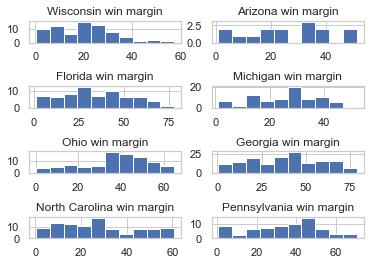

In [320]:
#historgrams of margins of victories in counties by state 2016
fig, ax = plt.subplots(4,2)
i = 0
j = 0 
for state in set(explore['state']):
    if j == 2:
        j = 0
        i +=1
    state_df = explore[(explore['state']==state)&(explore['year']==2016)]
    ax[i][j].hist(state_df['win_margin_percent'])
    ax[i][j].set_title(f'{state} win margin')
    fig.subplots_adjust(hspace=2)
    j+=1

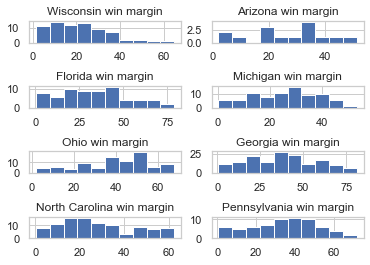

In [321]:
#historgrams of margins of victories in counties by state 2020
fig, ax = plt.subplots(4,2)
i = 0
j = 0 
for state in set(explore['state']):
    if j == 2:
        j = 0
        i +=1
    state_df = explore[(explore['state']==state)&(explore['year']==2020)]
    ax[i][j].hist(state_df['win_margin_percent'])
    ax[i][j].set_title(f'{state} win margin')
    fig.subplots_adjust(hspace=2)
    j+=1

## Proportion of State

p_state = (total votes in county)/(total votes in state)
  - represents the % of the voter population that came from that county in that election year

In [322]:
def part_state(row):
    '''
    Calculates the proportion of the overall votes that each county in a state is worth. 
    '''
    state, year = row['state'], row['year']
    pop = int(by_state_margins.loc[(by_state_margins['state']==state) &(by_state_margins['year']==year)]['total'])
    new = row['total']/pop*100
    return new

explore['p_state']=explore.apply(part_state,axis=1,result_type='expand')
explore.sort_values(['state','year','p_state','win_margin_percent']).head()

,year,state,state_po,county,dem,gop,total,win_by_count,win_margin_percent,party_won,p_state
5,2012,Arizona,AZ,GREENLEE COUNTY,1310,1592,2974,-282,9.482179,Rep,0.129346
6,2012,Arizona,AZ,LA PAZ COUNTY,1880,3714,5717,-1834,32.079762,Rep,0.248646
4,2012,Arizona,AZ,GRAHAM COUNTY,3609,8076,11855,-4467,37.680304,Rep,0.515602
12,2012,Arizona,AZ,SANTA CRUZ COUNTY,9486,4235,13894,5251,37.793292,Dem,0.604283
3,2012,Arizona,AZ,GILA COUNTY,7697,13455,21528,-5758,26.746563,Rep,0.936304


## 2012 vs 2016 Exploration

In [323]:
#find counties that changed party from '12 to '16
df_1216 = explore[(explore['year']==2012) | (explore['year']==2016)]
df_1216 = df_1216[df_1216['party_won']=='Dem']
check = df_1216.groupby(['state','county','party_won'],as_index=False)['year'].count()
change = check[check['year']==1].iloc[:,:2]
print(change.groupby(['state'])['county'].count())
print('total counties flipped = ',sum(change.groupby(['state'])['county'].count()))
change_1216_full = pd.merge(change,
                      data,
                      how = 'left',
                      left_on = ['state','county'],
                      right_on = ['state','county'])

change_1216_full = change_1216_full[(change_1216_full['year']==2012) | (change_1216_full['year']==2016)]
change_1216_full[change_1216_full['year']==2016].head(5)
change_1216_full.to_csv('1216Flip.csv')

state
Florida            4
Georgia            9
Michigan          12
North Carolina     8
Ohio               9
Pennsylvania       4
Wisconsin         23
Name: county, dtype: int64
total counties flipped =  69


In [324]:
df_12, df_16, df_20 = (explore[explore['year']==x].drop('year', axis=1) for x in [2012, 2016, 2020])
df_12 = df_12.set_index('state',drop=True)
df_16 = df_16.set_index('state',drop=True)
df_20 = df_20.set_index('state',drop=True)

In [435]:
#Create dataframe of only changes between elections
df_ch = pd.DataFrame(df_12.iloc[:,0:3])
df_ch['1216_vdDem'] = df_16['dem']-df_12['dem']
df_ch['1216_vdGOP'] = df_16['gop']-df_12['gop']
#if postive more people voted in 2016
df_ch['1216_vdtotal'] = df_16['total']-df_12['total']
#if postive margin higher in 2016
df_ch['1216_margin'] = df_16['win_margin_percent']-df_12['win_margin_percent']

df_ch['1216_Flip'] = [
                      x if ((x == 'Dem to Rep') | (x =='Rep to Dem')) 
                      else 'No Change' 
                      for x in (df_12['party_won']+" to "+df_16['party_won'])
                     ]

In [326]:
#Count of Counties by state and by flip direction
df1216 = df_ch[df_ch['1216_Flip']!='No Change']
county_count = pd.DataFrame(
    df1216.groupby(['state','1216_Flip'])['state_po'].count()).rename(columns={'state_po':'Num_Counties'}
                            )
df1216.groupby('1216_Flip').count()

,state_po,county,dem,1216_vdDem,1216_vdGOP,1216_vdtotal,1216_margin
1216_Flip,,,,,,,
Dem to Rep,64,64,64,64,64,64,64
Rep to Dem,5,5,5,5,5,5,5


## 2016 vs. 2020 Exploration

In [327]:
#find counties that changes from '12 to '16
df_1620 = explore[(explore['year']==2016) | (explore['year']==2020)]
df_1620 = df_1620[df_1620['party_won']=='Dem']
check2 = df_1620.groupby(['state','county','party_won'],as_index=False)['year'].count()
change2 = check2[check2['year']==1].iloc[:,:2]
print(change2.groupby(['state'])['county'].count())
print('total counties flipped = ',sum(change2.groupby(['state'])['county'].count()))
change_1620_full = pd.merge(change2,
                      data,
                      how = 'left',
                      left_on = ['state','county'],
                      right_on = ['state','county'])

change_1620_full = change_1620_full[(change_1620_full['year']==2016) | (change_1620_full['year']==2020)]
change_1620_full.head(5)
change_1620_full.to_csv('1620Flip.csv')

state
Arizona           1
Florida           3
Georgia           1
Michigan          3
North Carolina    3
Ohio              3
Pennsylvania      2
Wisconsin         2
Name: county, dtype: int64
total counties flipped =  18


In [328]:
#Adds to change data frame the changes between 2020 and 2016
df_ch['1620_vdDem'] = df_20['dem']-df_16['dem']
df_ch['1620_vdGOP'] = df_20['gop']-df_16['gop']
#if postive more people voted in 2016
df_ch['1620_vdtotal'] = df_20['total']-df_16['total']
#if postive margin higher in 2016
df_ch['1620_margin'] = df_20['win_margin_percent']-df_16['win_margin_percent']
df_ch['1620_Flip'] = [
                        x if ((x == 'Dem to Rep') | (x =='Rep to Dem')) 
                        else 'No Change' 
                        for x in (df_16['party_won']+" to "+df_20['party_won'])
                    ]

In [329]:
#Count of Counties by state and by flip direction
df1620 = df_ch[df_ch['1620_Flip']!='No Change']
county_count = pd.DataFrame(
    df1620.groupby(['state','1620_Flip'])['state_po'].count()).rename(columns={'state_po':'Num_Counties'}
                            )
df1620.groupby('1620_Flip').count()
county_count

Num_Counties
state          1620_Flip               
Arizona        Rep to Dem             1
Florida        Rep to Dem             3
Georgia        Dem to Rep             1
Michigan       Rep to Dem             3
North Carolina Dem to Rep             1
               Rep to Dem             2
Ohio           Dem to Rep             2
               Rep to Dem             1
Pennsylvania   Rep to Dem             2
Wisconsin      Rep to Dem             2

In [330]:
#Counties that flipped twice
Flipped = df_ch[(df_ch['1216_Flip']!=0) | (df_ch['1620_Flip']!=0)]
df_16=df_16.rename(columns={'p_state':'p_state16'})
df_20=df_20.rename(columns={'p_state':'p_state20'})

Flipped = pd.merge(Flipped,
                   df_16[['state_po','county','p_state16']],
                  how = 'left',
                left_index=True,
                  left_on = ['county'],
                  right_on = ['county'])
Flipped = pd.merge(Flipped,
                   df_20[['state_po','county','p_state20']],
                  how = 'left',
                   left_index=True,
                  left_on = ['county'],
                  right_on = ['county'])
Flipped[Flipped['1620_Flip']!='0'].sort_values('p_state20', ascending = False)

,state_po_x,county,dem,1216_vdDem,1216_vdGOP,1216_vdtotal,1216_margin,1216_Flip,1620_vdDem,1620_vdGOP,1620_vdtotal,1620_margin,1620_Flip,state_po_y,p_state16,state_po,p_state20
state,,,,,,,,,,,,,,,,,
Arizona,AZ,MARICOPA COUNTY,602288,100619,-2524,191276,-7.886801,No Change,337867,248304,500310,-0.654242,Rep to Dem,AZ,60.202275,AZ,61.092006
Michigan,NC,WAYNE COUNTY,23314,-1544,-101,-663,2.956984,No Change,2445,3169,4848,0.309965,No Change,NC,1.069035,MI,15.752069
Michigan,GA,WAYNE COUNTY,2596,-555,596,144,10.385412,No Change,646,1834,2365,-1.566420,No Change,OH,0.906998,MI,15.752069
Michigan,GA,WAYNE COUNTY,2596,-555,596,144,10.385412,No Change,646,1834,2365,-1.566420,No Change,NC,1.069035,MI,15.752069
Michigan,GA,WAYNE COUNTY,2596,-555,596,144,10.385412,No Change,646,1834,2365,-1.566420,No Change,MI,16.207376,MI,15.752069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Georgia,NC,CLAY COUNTY,1579,-212,464,368,8.649769,No Change,332,675,883,-1.567531,No Change,NC,0.126751,GA,0.028689
Michigan,MI,KEWEENAW COUNTY,582,-55,40,42,6.220844,No Change,145,48,123,-7.810993,No Change,MI,0.029879,MI,0.028114
Georgia,GA,WEBSTER COUNTY,582,-109,29,-71,12.467426,No Change,166,118,274,-6.226374,No Change,GA,0.027122,GA,0.027808


In [331]:
pd.DataFrame(df_ch.groupby(['1216_Flip', '1620_Flip'])['county'].count()).rename(columns={'county':'count'})

count
1216_Flip  1620_Flip        
Dem to Rep No Change      56
           Rep to Dem      8
No Change  Dem to Rep      4
           No Change     572
           Rep to Dem      6
Rep to Dem No Change       5

In [332]:
df_ch[df_ch['1216_Flip'] == 'Rep to Dem']

,state_po,county,dem,1216_vdDem,1216_vdGOP,1216_vdtotal,1216_margin,1216_Flip,1620_vdDem,1620_vdGOP,1620_vdtotal,1620_margin,1620_Flip
state,,,,,,,,,,,,,
Georgia,GA,COBB COUNTY,133124,26997,-18810,20703,-10.267173,Rep to Dem,61725,12547,62927,12.141516,No Change
Georgia,GA,GWINNETT COUNTY,132509,33644,-12866,31603,-3.379055,Rep to Dem,75674,19424,85534,12.385091,No Change
Georgia,GA,HENRY COUNTY,43761,6296,-1050,7388,1.089845,Rep to Dem,23219,2463,23976,16.053299,No Change
North Carolina,NC,WATAUGA COUNTY,13002,1136,-164,2311,-1.633261,Rep to Dem,2984,754,2235,6.819147,No Change
Pennsylvania,PA,CHESTER COUNTY,124311,17371,-8726,16827,9.301962,Rep to Dem,40690,12451,45702,7.596730,No Change


### Notes

- 8 flipped in 12-16 and 16-20 all went Dem-Rep-Dem: only 5 in states that also flipped
- 10 counties flipped in 16-20 that didn't flip 12 - 16: 4 Dem - Rep and 6 Rep - Dem
- 61 counties flipped in 12 - 16 but did not flip 16 -20: 56 Dem - Rep and 5 Rep - Dem

## Proportion of State Metrics

In [333]:
explore.sort_values('p_state', ascending = False).head(50)

,year,state,state_po,county,dem,gop,total,win_by_count,win_margin_percent,party_won,p_state
1381,2020,Arizona,AZ,MARICOPA COUNTY,1040774,995665,2068144,45109,2.181134,Dem,61.092006
658,2016,Arizona,AZ,MARICOPA COUNTY,702907,747361,1567834,-44454,2.835377,Rep,60.202275
7,2012,Arizona,AZ,MARICOPA COUNTY,602288,749885,1376558,-147597,10.722178,Rep,59.869766
322,2012,Michigan,MI,WAYNE COUNTY,595846,213814,815825,382032,46.827690,Dem,17.244382
10,2012,Arizona,AZ,PIMA COUNTY,201251,174779,382250,26472,6.925311,Dem,16.624957
973,2016,Michigan,MI,WAYNE COUNTY,519444,228993,777838,290451,37.340809,Dem,16.207376
661,2016,Arizona,AZ,PIMA COUNTY,224661,167428,421640,57233,13.573902,Dem,16.190290
619,2012,Wisconsin,WI,MILWAUKEE COUNTY,332438,154924,492576,177514,36.037891,Dem,16.037330
1696,2020,Michigan,MI,WAYNE COUNTY,597170,264553,872383,332617,38.127405,Dem,15.752069
1384,2020,Arizona,AZ,PIMA COUNTY,304981,207758,520397,97223,18.682467,Dem,15.372284


In [334]:
#explores the distribution of how much each county is "worth" overall in the state.
explore.groupby(['state_po']).agg({'p_state':['mean','min','max','std']})

p_state                                
              mean       min        max        std
state_po                                          
AZ        6.666667  0.108853  61.092006  15.022944
FL        1.492537  0.032175  10.452411   2.137850
GA        0.628931  0.018566  10.496367   1.387946
MI        1.204819  0.028114  17.244382   2.578458
NC        1.000000  0.032888  11.436226   1.622959
OH        1.136364  0.097960  11.544554   1.873021
PA        1.492537  0.035237  12.022330   2.201465
WI        1.388889  0.042981  16.037330   2.287437

## Obama Vs. Biden (12-20)

In [335]:
df_OB = pd.DataFrame(df_12.iloc[:,0:3])
#dem percents 
df_OB['pdem_12'] = df_12['dem']/df_12['total']*100
df_OB['pdem_20'] = df_20['dem']/df_20['total']*100
#change in % between 12 and 20
df_OB['pdf_dem'] = df_OB['pdem_20']-df_OB['pdem_12']
#difference in votes by count
df_OB['1220_vdDem'] = df_20['dem']-df_12['dem']

#gop percents
df_OB['pgop_12'] = df_12['gop']/df_12['total']*100
df_OB['pgop_20'] = df_20['gop']/df_20['total']*100
#change in % between 12 and 20
df_OB['pdf_gop'] = df_OB['pgop_20']-df_OB['pgop_12']
#difference in votes by count
df_OB['1220_vdGOP'] = df_20['gop']-df_12['gop']

# Change in voters between 12 and 20 (pure number of voter increase)
df_OB['1220_vdtotal'] = df_20['total']-df_12['total']
#% increase from 2012 to 2020
df_OB['1220_totpch'] = (df_20['total']-df_12['total'])/df_12['total']*100

df_OB['1220_margin'] = df_20['win_margin_percent']-df_12['win_margin_percent']
df_OB['1220_Flip'] = [
                        x if ((x == 'DemRep') | (x =='RepDem')) 
                        else '0' 
                        for x in (df_12['party_won']+df_20['party_won'])
                     ]

In [336]:
df_OB[(df_OB['pdf_dem']<0) & (df_OB['1220_vdDem']>0)]

,state_po,county,dem,pdem_12,pdem_20,pdf_dem,1220_vdDem,pgop_12,pgop_20,pdf_gop,1220_vdGOP,1220_vdtotal,1220_totpch,1220_margin,1220_Flip
state,,,,,,,,,,,,,,,
Arizona,AZ,APACHE COUNTY,17147,66.337821,66.225975,-0.111846,6146,31.917363,32.531559,0.614196,3192,9324,36.072423,-0.726042,0
Arizona,AZ,GILA COUNTY,7697,35.753437,32.329550,-3.423888,1246,62.500000,66.434097,3.934097,4922,6134,28.493125,7.357985,0
Arizona,AZ,GRAHAM COUNTY,3609,30.442851,26.902301,-3.540550,425,68.123155,71.683895,3.560740,2673,3140,26.486714,7.101290,0
Arizona,AZ,LA PAZ COUNTY,1880,32.884380,29.981228,-2.903152,356,64.964142,68.771789,3.807647,1415,1741,30.453035,6.710798,0
Arizona,AZ,MOHAVE COUNTY,19533,27.900300,23.723583,-4.176717,5298,70.229967,75.032484,4.802517,29367,34658,49.504357,8.979233,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisconsin,WI,MENOMINEE COUNTY,1191,86.492375,82.208202,-4.284173,112,12.999274,17.539432,4.540158,99,208,15.105301,-8.824331,0
Wisconsin,WI,OUTAGAMIE COUNTY,45659,48.267369,44.037774,-4.229595,2000,50.078227,53.943247,3.865019,11007,13627,14.405472,8.094614,0
Wisconsin,WI,SAWYER COUNTY,4486,49.706371,42.885772,-6.820600,8,49.218837,56.140853,6.922017,1441,1454,16.110803,12.767547,DemRep


In [337]:
# Comparison of difference in dem percent between 2012 and 2020
# Negative means Obama carried a higher percentage of votes in 2012 than Biden in 2020
df_OB.groupby(['state_po']).agg({'pdf_dem':['mean','min','max','std']})

pdf_dem                                
               mean        min        max       std
state_po                                           
AZ        -0.365991 -11.972436   6.570871  4.653608
FL        -3.727185 -13.514992   5.496004  4.477217
GA        -2.120980 -10.087140  14.810339  5.103413
MI        -7.442212 -17.056197   6.543170  5.768557
NC        -3.625370 -17.877839   7.309547  4.342712
OH       -11.136646 -23.788174   8.156080  6.752517
PA        -5.622690 -14.519663   8.652501  5.052413
WI        -8.511356 -18.135494   8.822127  5.601491

In [338]:
df_OB[df_OB['pdf_dem']>0].groupby(['state_po']).agg({'pdf_dem':['mean','min','max','std']})

pdf_dem                               
              mean       min        max       std
state_po                                         
AZ        3.708211  0.810906   6.570871  2.361108
FL        2.776582  0.012112   5.496004  1.791586
GA        4.995405  0.170637  14.810339  4.389835
MI        3.550071  0.073572   6.543170  2.129980
NC        3.547122  0.058058   7.309547  1.987673
OH        3.738717  0.536480   8.156080  2.852347
PA        3.246585  1.133380   8.652501  2.405370
WI        4.447242  0.773401   8.822127  3.355856

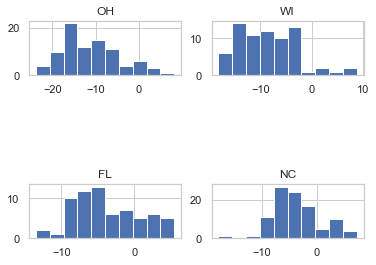

In [339]:
#historgrams of margins of victories in counties by state 2012
plt1 = ['OH', 'WI', 'FL', 'NC']
plt2 = ['PA', 'MI', 'GA', 'AZ']
fig, ax = plt.subplots(2,2)
i = 0
j = 0 
for state in plt1:
    if j == 2:
        j = 0
        i +=1
    state_df = df_OB[(df_OB['state_po']==state)]
    ax[i][j].hist(state_df['pdf_dem'])
    ax[i][j].set_title(f'{state}')
    fig.subplots_adjust(hspace=2)
    j+=1

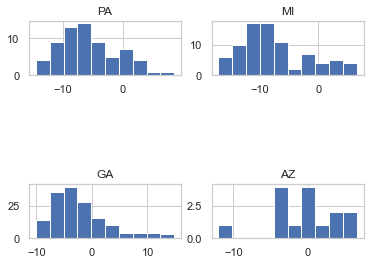

In [340]:
fig, ax = plt.subplots(2,2)
i = 0
j = 0
for state in plt2:
    if j == 2:
        j = 0
        i +=1
    state_df = df_OB[(df_OB['state_po']==state)]
    ax[i][j].hist(state_df['pdf_dem'])
    ax[i][j].set_title(f'{state}')
    fig.subplots_adjust(hspace=2)
    j+=1

In [381]:
df_OB[df_OB['pdf_dem']>0].groupby(['state_po'])['county'].count()

state_po
AZ     6
FL    15
GA    40
MI    11
NC    18
OH     6
PA    10
WI     5
Name: county, dtype: int64

state_po
AZ     15
FL     67
GA    159
MI     83
NC    100
OH     88
PA     67
WI     72
Name: county, dtype: int64
state_po
OH     6.818182
WI     6.944444
MI    13.253012
PA    14.925373
NC    18.000000
FL    22.388060
GA    25.157233
AZ    40.000000
Name: county, dtype: float64


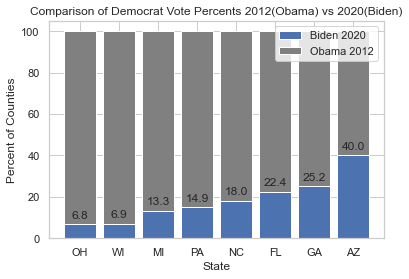

In [341]:
#Graph of % of counties in a state for which Biden won a higher % of votes in 2020 than Obama won in 2012
total_counties = df_OB.groupby(['state_po'])['county'].count()
print(total_counties)
perBiden = df_OB[df_OB['pdf_dem']>0].groupby(['state_po'])['county'].count()/total_counties*100
perBiden = perBiden.sort_values()
print(perBiden)
fig, ax = plt.subplots()

ax.bar(perBiden.index,perBiden,label='Biden 2020')
ax.bar(perBiden.index,100-perBiden,color ='grey',label='Obama 2012',bottom = perBiden)

ax.set_ylabel('Percent of Counties')
ax.set_xlabel('State')
ax.legend()
ax.set_title('Comparison of Democrat Vote Percents 2012(Obama) vs 2020(Biden)')

for p in ax.patches:
    if p.get_height()>40:
        continue
    else:
        ax.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

In [383]:
df_OB[df_OB['1220_Flip']!='No Change'].groupby(['1220_Flip']).count()

,state_po,county,dem,pdem_12,pdem_20,pdf_dem,1220_vdDem,pgop_12,pgop_20,pdf_gop,1220_vdGOP,1220_vdtotal,1220_totpch,1220_margin
1220_Flip,,,,,,,,,,,,,,
0,580,580,580,580,580,580,580,580,580,580,580,580,580,580
DemRep,60,60,60,60,60,60,60,60,60,60,60,60,60,60
RepDem,11,11,11,11,11,11,11,11,11,11,11,11,11,11


In [344]:
print('Number of counties with more dem votes in 2020 than 2012:', df_OB[df_OB['1220_vdDem']>0]['state_po'].count())
df_OB[df_OB['1220_vdDem']>0].groupby(['state_po']).agg({'1220_vdDem':['count','mean','min','max']})

Number of counties with more dem votes in 2020 than 2012: 296


1220_vdDem                           
              count          mean  min     max
state_po                                      
AZ               14  46217.071429  356  438486
FL               44  24274.340909   85  121349
GA               93   7663.075269    3  125674
MI               28  10484.857143   62   85146
NC               57   9403.526316   29  126074
OH               11  10014.818182  541   45248
PA               34  14498.794118   36   86155
WI               15   6142.333333    8   44086

In [345]:
print('Number of counties with fewer dem votes in 2020 than 2012:',df_OB[df_OB['1220_vdDem']<0]['state_po'].count())
test = df_OB[df_OB['1220_vdDem']<0]
df_OB[df_OB['1220_vdDem']<0].groupby(['state_po']).agg({'1220_vdDem':['count','mean','min','max']})

Number of counties with fewer dem votes in 2020 than 2012: 355


1220_vdDem                         
              count         mean    min  max
state_po                                    
AZ                1  -128.000000   -128 -128
FL               23  -381.826087  -1368  -29
GA               66  -181.606061  -1718   -2
MI               55  -983.727273  -9588  -20
NC               43  -699.837209  -5968  -79
OH               77 -4339.000000 -44917 -627
PA               33  -869.909091  -3824  -90
WI               57 -1449.421053 -15187  -48

In [346]:
df_OB[df_OB['1220_vdDem']<0].groupby(['state_po']).agg({'1220_totpch':['mean','min','max']})

1220_totpch                      
                mean        min        max
state_po                                  
AZ         23.907196  23.907196  23.907196
FL         15.915860   6.079324  30.185139
GA          9.569517  -6.877819  37.193546
MI         17.664945   5.389447  28.087721
NC          9.643387  -6.005950  27.095420
OH          4.535762 -10.203343  14.368031
PA         22.296087  13.427494  32.868451
WI          9.587256  -6.829606  17.095523

### Turnout Comparison

In [347]:
#load in data
TOdata= pd.read_csv(r'graphs/tbc_raw.csv')
TOdata

TOcounty = pd.read_csv(r'Raw Data Files/voter_turnout_by_county.csv')
x = TOcounty[TOcounty.state=='Arizona']
x[x.county=='MARICOPA COUNTY']

,state,county,year,total,dem,gop,AGE18PLUS_TOT,repturnout,demturnout,turnout,winner
21,Arizona,MARICOPA COUNTY,2012,1376558,602288,749885,2936120,0.255400,0.205131,0.468836,red
22,Arizona,MARICOPA COUNTY,2016,1567834,702907,747361,3211784,0.232693,0.218853,0.488151,red
23,Arizona,MARICOPA COUNTY,2020,2068144,1040774,995665,3432976,0.290030,0.303170,0.602435,blue


In [348]:
TOdata.rename(columns = {
    "Unnamed: 0":'state',
    "Unnamed: 1":'county',
    "turnout":'TO_12', 
    "turnout.1":'TO_16', 
    "turnout.2":'TO_20',
    'winner':'Win_12',
    "winner.1":'Win_16',
    "winner.2":'Win_20'}, inplace = True)

In [349]:
TOdata.drop(0, axis=0, inplace=True)

In [350]:
TOdata.drop(1, axis=0, inplace=True)

,state,county,TO_12,TO_16,TO_20,Win_12,Win_16,Win_20,AGE18PLUS_TOT,AGE18PLUS_TOT.1,AGE18PLUS_TOT.2
2,Arizona,APACHE COUNTY,0.511022,0.537691,0.670428,blue,blue,blue,50581.0,51444.0,52462.0
3,Arizona,COCHISE COUNTY,0.478003,0.509759,0.610840,red,red,red,102516.0,98115.0,98949.0
4,Arizona,COCONINO COUNTY,0.491016,0.539732,0.638670,blue,blue,blue,105355.0,110766.0,114726.0
5,Arizona,GILA COUNTY,0.512620,0.525322,0.637902,red,red,red,41996.0,42473.0,43364.0
6,Arizona,GRAHAM COUNTY,0.445191,0.443413,0.526417,red,red,red,26629.0,27365.0,28485.0
...,...,...,...,...,...,...,...,...,...,...,...
648,Wisconsin,WAUKESHA COUNTY,0.806778,0.768029,0.839737,red,red,red,302259.0,311241.0,318146.0
649,Wisconsin,WAUPACA COUNTY,0.709890,0.639772,0.714844,red,red,red,40626.0,40677.0,40690.0
650,Wisconsin,WAUSHARA COUNTY,0.611356,0.612288,0.678777,red,red,red,19707.0,19597.0,19983.0
651,Wisconsin,WINNEBAGO COUNTY,0.671913,0.648243,0.686856,blue,red,red,132715.0,134431.0,136902.0


# Big Data Set With Delta Calculations

In [352]:
df_16['state']=df_16.index
df_20['state']=df_16.index

df1 = pd.merge(df_ch,
                   df_16[['state_po','county','p_state16']],
                  how = 'left',
               left_index=True,
                  left_on = ['state_po','county'],
                  right_on = ['state_po','county'])
df1 = pd.merge(df1,
                   df_20[['state_po','county','p_state20']],
                  how = 'left',
               left_index=True,
                  left_on = ['state_po','county'],
                  right_on = ['state_po','county'])

#Flipped[Flipped['1620_Flip']!=0].sort_values('p_state20', ascending = False)
#df1['state']=df1.index
#df = df1.set_index('state_po', drop=True)

df1 = pd.merge(df1,
                   TOdata,
                  how = 'left',
                  left_on = ['state','county'],
                  right_on = ['state','county'])

In [424]:
#Turnout for three counties that flipped
df = df1[['state','county','1216_margin', '1216_Flip','1620_margin', '1620_Flip', 'p_state16', 'p_state20', 'TO_12', 'TO_16','TO_20','Win_12','Win_16','Win_20']]
pd.DataFrame(df.groupby(['state','1216_Flip','Win_16'])['p_state16'].sum()).to_excel('1216props.xlsx')
pd.DataFrame(df.groupby(['state','1620_Flip','Win_20'])['p_state20'].sum()).to_excel('1620props.xlsx')

In [354]:
pd.DataFrame(df.groupby(['state','Win_20'])['p_state20'].sum())

p_state20
state          Win_20           
Arizona        blue    80.245349
               red     19.754651
Florida        blue    54.774946
               red     45.225054
Georgia        blue    53.266852
               red     46.733148
Michigan       blue    53.790754
               red     46.209246
North Carolina blue    51.106191
               red     48.893809
Ohio           blue    41.324589
               red     58.675411
Pennsylvania   blue    56.832643
               red     43.167357
Wisconsin      blue    36.196715
               red     63.803285

## Margin Analysis

In [356]:
bymargin20 = df.sort_values('1620_margin', ascending = False)
#sums up how much each county is "worth" of the state
y = bymargin20.groupby(['state','Win_20'],as_index=False)['p_state20'].sum()

In [357]:
bymargin16 = df.sort_values('1216_margin', ascending = False)
#sums up how much each county is "worth" of the state
z = bymargin16.groupby(['state','Win_16'], as_index = False)['p_state16'].sum()
z

,state,Win_16,p_state16
0,Arizona,blue,20.179036
1,Arizona,red,79.820964
2,Florida,blue,43.114938
3,Florida,red,56.885062
4,Georgia,blue,54.187670
5,Georgia,red,45.812330
6,Michigan,blue,45.753221
7,Michigan,red,54.246779
8,North Carolina,blue,48.615457
9,North Carolina,red,51.384543


In [358]:
by_state_margins[by_state_margins['year']==2020]

,state,year,total,win_by_count,state_margin
2,Arizona,2020,3385294,10457,0.308895
5,Florida,2020,11067456,-371686,3.358369
8,Georgia,2020,4998482,12670,0.253477
11,Michigan,2020,5538212,154188,2.784075
14,North Carolina,2020,5524812,-74477,1.348046
17,Ohio,2020,5762920,-470737,8.168376
20,Pennsylvania,2020,6907539,80806,1.169823
23,Wisconsin,2020,3296650,20427,0.619629


## Number of counties won vs. weigth of counties won

Text(0.5, 1.0, 'Percent of State Won based on County Votes in 2020')

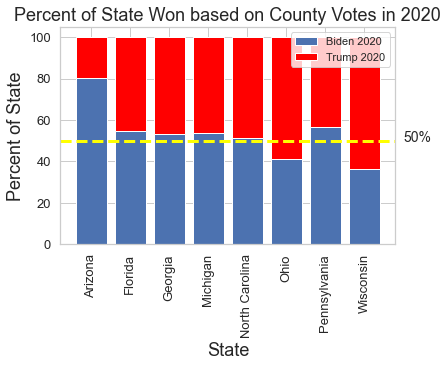

In [359]:
fig, ax = plt.subplots()
ax.bar(y[y['Win_20']=='blue']['state'],y[y['Win_20']=='blue']['p_state20'],label='Biden 2020')
ax.bar(y[y['Win_20']=='red']['state'],y[y['Win_20']=='red']['p_state20'],color ='red',label='Trump 2020',bottom = y[y['Win_20']=='blue']['p_state20'])
plt.axhline(y=50,linewidth=3,linestyle='--',color='yellow')

ax.set_ylabel('Percent of State',fontsize=18)
ax.set_xlabel('State',fontsize=18)
plt.xticks(rotation='90',fontsize=13)
plt.yticks(fontsize=13)
ax.legend()
ax.annotate('50%', (8,.47),xycoords=ax.get_xaxis_transform(),fontsize=14)
ax.set_title('Percent of State Won based on County Votes in 2020',fontsize=18)

In [426]:
j = bymargin16.groupby(['state','Win_20'], as_index = False)['county'].count()

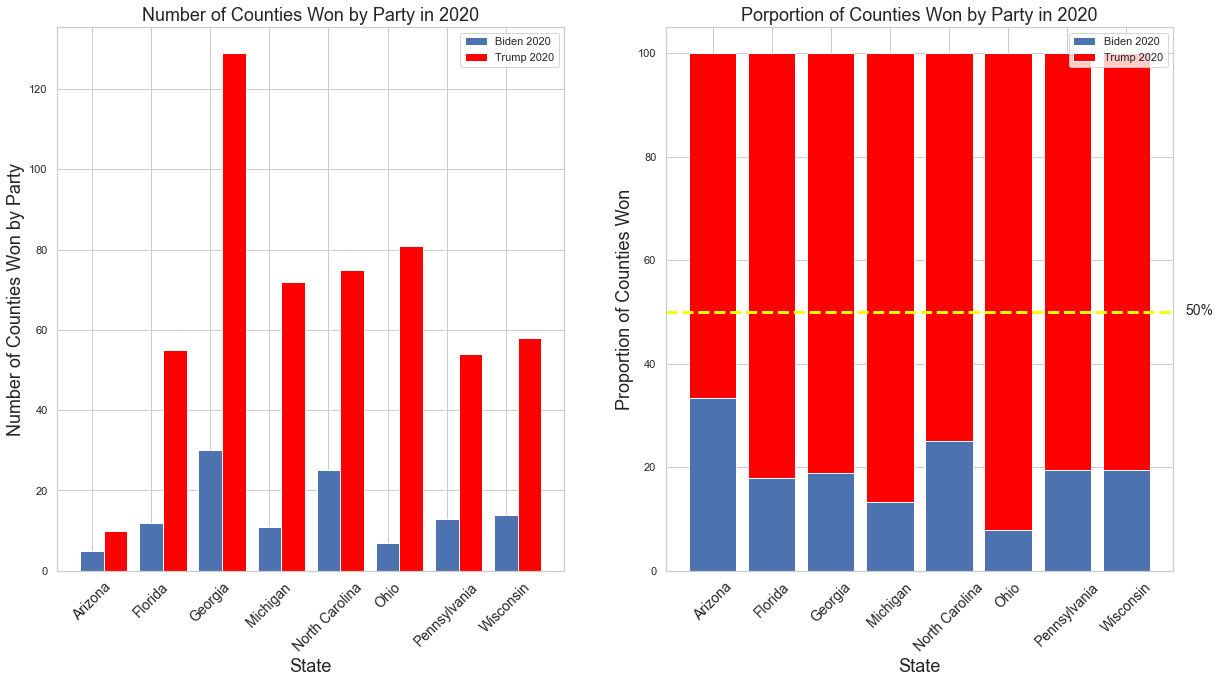

In [372]:
#Comparison of number of counties won
width = .4
ind = np.arange(len(j[j['Win_20']=='blue']['state']))
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].bar(ind,j[j['Win_20']=='blue']['county'],width, label='Biden 2020')
ax[0].bar(ind+width,j[j['Win_20']=='red']['county'], width, color ='red',label='Trump 2020')

ax[0].set_ylabel('Number of Counties Won by Party',fontsize=18)
ax[0].set_xlabel('State',fontsize=18)
ax[0].set_xticks(ind)
ax[0].set_xticklabels(j[j['Win_20']=='blue']['state'],rotation='45',fontsize=14)
ax[0].legend()
ax[0].set_title('Number of Counties Won by Party in 2020',fontsize=18)

ax[1].bar(j[j['Win_20']=='blue']['state'],j[j['Win_20']=='blue']['county']/jhat['totcon']*100,label='Biden 2020')
ax[1].bar(j[j['Win_20']=='red']['state'],j[j['Win_20']=='red']['county']/jhat2['totcon']*100,color ='red',label='Trump 2020',bottom = j[j['Win_20']=='blue']['county']/jhat['totcon']*100)
ax[1].axhline(y=50,linewidth=3,linestyle='--',color='yellow')
ax[1].annotate('50%', (8,.47),xycoords=ax[1].get_xaxis_transform(),fontsize=14)
ax[1].set_ylabel('Proportion of Counties Won',fontsize=18)
ax[1].set_xlabel('State',fontsize=18)
plt.xticks(rotation='45',fontsize=14)
ax[1].legend()
ax[1].set_title('Porportion of Counties Won by Party in 2020',fontsize=18)
plt.savefig('unweightedCounties.png')

In [138]:
jhat = j[j['Win_20']=='blue']
jhat['totcon'] = [15, 67, 159, 83, 100, 88, 67, 72]
jhat

jhat2 = j[j['Win_20']=='red']
jhat2['totcon'] = [15, 67, 159, 83, 100, 88, 67, 72]
jhat2

<ipython-input-138-dbe09a51a963>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jhat['totcon'] = [15, 67, 159, 83, 100, 88, 67, 72]
<ipython-input-138-dbe09a51a963>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jhat2['totcon'] = [15, 67, 159, 83, 100, 88, 67, 72]


,state,Win_20,county,totcon
1,Arizona,red,10,15
3,Florida,red,55,67
5,Georgia,red,129,159
7,Michigan,red,72,83
9,North Carolina,red,75,100
11,Ohio,red,81,88
13,Pennsylvania,red,54,67
15,Wisconsin,red,58,72


Text(0.5, 1.0, 'Porportion of Counties Won by Party in 2020')

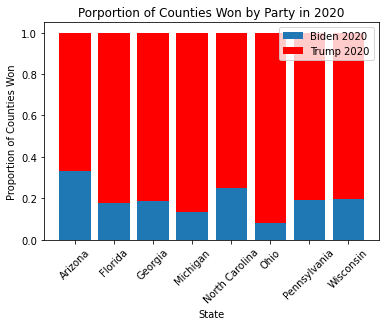

In [139]:
#%of counties won
fig, ax = plt.subplots()
ax.bar(j[j['Win_20']=='blue']['state'],j[j['Win_20']=='blue']['county']/jhat['totcon'],label='Biden 2020')
ax.bar(j[j['Win_20']=='red']['state'],j[j['Win_20']=='red']['county']/jhat2['totcon'],color ='red',label='Trump 2020',bottom = j[j['Win_20']=='blue']['county']/jhat['totcon'])


ax.set_ylabel('Proportion of Counties Won')
ax.set_xlabel('State')
plt.xticks(rotation='45')
ax.legend()
ax.set_title('Porportion of Counties Won by Party in 2020')

Text(0.5, 1.0, 'Comparison Republican Vote Percents 2012(Romney) 2020(Trump)')

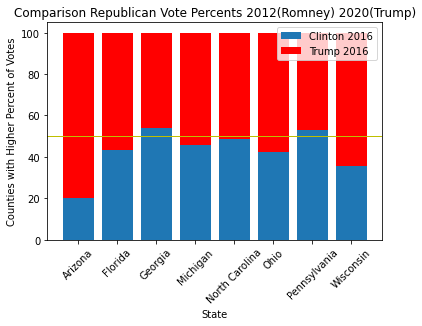

In [140]:
fig, ax = plt.subplots()
ax.bar(z[z['Win_16']=='blue']['state'],z[z['Win_16']=='blue']['p_state16'],label='Clinton 2016')
ax.bar(z[z['Win_16']=='red']['state'],z[z['Win_16']=='red']['p_state16'],color ='red',label='Trump 2016',bottom = z[z['Win_16']=='blue']['p_state16'])
plt.axhline(y=50,linewidth=1,color='y')

ax.set_ylabel('Counties with Higher Percent of Votes')
ax.set_xlabel('State')
plt.xticks(rotation='45')
ax.legend()
ax.set_title('Comparison Republican Vote Percents 2012(Romney) 2020(Trump)')

In [142]:
import seaborn as sns

Text(0.5, 1.0, 'Change in Democratic Vote Percent from 2012 to 2020 by State')

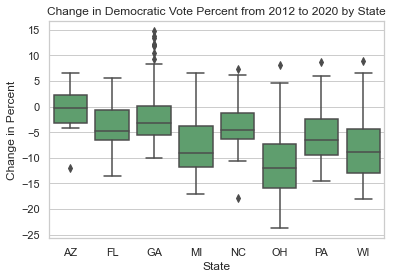

In [143]:
sns.set(style = 'whitegrid')
sns.boxplot(x='state_po', y='pdf_dem', color='g', data = df_OB)
plt.xlabel('State')
plt.ylabel('Change in Percent')
plt.title('Change in Democratic Vote Percent from 2012 to 2020 by State')

# Bokeh State maps

## Flipped County State Maps

In [391]:
df_GA = df[df.state=='Arizona']

counties = {
    code: county for code, county in counties.items() if county["state"] == "az"
}


In [392]:
county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = list(df_GA['1216_Flip'])
color_mapper = CategoricalColorMapper(factors=['Dem to Rep','Rep to Dem', 'No Change'], 
                                      palette=['red', 'blue','#B0B0B0'])

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    label=county_rates,
)
TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Arizona Counties Flipped from 2012 to 2016 Presidential Election", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("(Long, Lat)", "($x, $y)")
    ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'label', 'transform': color_mapper},
          fill_alpha=1, line_color="white", line_width=0.5)

show(p)

In [951]:
county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = list(df_GA['1620_Flip'])
color_mapper = CategoricalColorMapper(factors=['Dem to Rep','Rep to Dem', 'No Change'], 
                                      palette=['red', 'blue','#B0B0B0'])

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    label=county_rates,
)
TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Florida Counties Flipped from 2016 to 2020 Presidential Election", 
    tools=TOOLS,
    x_axis_location=None, 
    y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("(Long, Lat)", "($x, $y)")
    ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'label', 'transform': color_mapper},
          fill_alpha=1, line_color="white", line_width=0.5)

show(p)

###### Proportion of state gradient maps

In [393]:
county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_proportion = list(df_GA['p_state20'])

from bokeh.palettes import BuGn
palette = tuple(reversed(BuGn[6]))
color_mapper = LogColorMapper(palette=palette)
    
data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    prop=county_proportion,

)
TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Florida Total Vote Contribution by County 2020", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Proportion of State Voters", "@prop"), ("(Long, Lat)", "($x, $y)")
    ])

p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source = data, 
          fill_color={'field': 'prop', 'transform': color_mapper},
          fill_alpha=1, 
          line_color="white", 
          line_width=0.5)

# color_bar = ColorBar(color_mapper=color_mapper1, ticker=LogTicker(),
#                      label_standoff=9, border_line_color=None, location=(0,0))
# p.add_layout(color_bar, 'left')

county_names = [county['name'] for county in counties.values()]
county_rates = list(df_GA['1620_Flip'])
color_mapper = CategoricalColorMapper(factors=['Dem to Rep','Rep to Dem', 'No Change'], palette=['red', 'blue','#f0f0f0'])

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    label=county_rates,
)
p.patches('x', 'y', source=data,
          fill_color={'field': 'label', 'transform': color_mapper},
          fill_alpha=0, 
          line_color={'field': 'label', 'transform': color_mapper}, 
          line_alpha =.4,
          line_width=4,
          legend_field ='label')

show(p)

## State heat map of voter pop distribution and flipped counties

In [957]:
from bokeh.io import show
from bokeh.models import LogColorMapper, ColorBar, LogTicker, FixedTicker
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure
from bokeh.sampledata.us_counties import data as counties
from bokeh.models import ColumnDataSource, CategoricalColorMapper

df_GA = df[df.state=='Arizona']



counties = {
    code: county for code, county in counties.items() if county["state"] == "az"
}
county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

In [959]:
county_names = [county['name'] for county in counties.values()]
county_proportion = list(df_GA['1216_margin'])

from bokeh.palettes import BuGn
palette = tuple(reversed(BuGn[6]))
color_mapper1 = LogColorMapper(palette=palette, low=min(county_proportion), high = max(county_proportion))
    
data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    prop=county_proportion,

)
TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Arizona Percent Vote Contribution by County and Flipped Counties 2020", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Percent of State Voters", "@prop"), ("(Long, Lat)", "($x, $y)")
    ])

p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source = data, 
          fill_color={'field': 'prop', 'transform': color_mapper1},
          fill_alpha=1, 
          line_color="white", 
          line_alpha = 0, 
          line_width=0.4)

n_ticks = 100
ticks = np.logspace(min(county_proportion),max(county_proportion), n_ticks).round(2)

color_bar = ColorBar(color_mapper=color_mapper1, 
                     ticker=FixedTicker(ticks=ticks),
                     label_standoff=9, 
                     border_line_color=None, 
                     location=(0,0))
p.add_layout(color_bar, 'left')

county_names = [county['name'] for county in counties.values()]
county_rates = list(df_GA['1620_Flip'])
color_mapper = CategoricalColorMapper(factors=['Dem to Rep','Rep to Dem', 'No Change'], 
                                      palette=['red', 'blue','#F0F0F0'])

data2=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    label=county_rates,
)
p.patches('x', 'y', source=data2,
          fill_color={'field': 'label', 'transform': color_mapper},
          fill_alpha=0,
          line_color={'field': 'label', 'transform': color_mapper}, 
          line_alpha = .5, line_width=3,
         legend_field ='label')

show(p)

## State margin of victory heatmap

In [273]:
state = 'North Carolina'
df_GA = explore[(explore.state==state)&(explore.year==2020)]
df_GA2 = df[df.state==state]


counties = {
    code: county for code, county in counties.items() if county["state"] == "nc"
}
county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

In [432]:
county_names = [county['name'] for county in counties.values()]
county_proportion = list(df_GA['win_margin_percent'])

palette = tuple(reversed(Greys[6]))
color_mapper1 = LinearColorMapper(palette=palette, low=min(county_proportion), high = max(county_proportion))
    
data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    prop=county_proportion,

)
TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Georgia Margin of Victory Heat Map 2020", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Percent of State Voters", "@prop"), ("(Long, Lat)", "($x, $y)")
    ])

p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source = data, 
          fill_color={'field': 'prop', 'transform': color_mapper1},
          fill_alpha=1, 
          line_color="white", 
          line_alpha = 0, 
          line_width=0.4)

n_ticks = 100
ticks = np.logspace(min(county_proportion),max(county_proportion), n_ticks).round(2)

color_bar = ColorBar(color_mapper=color_mapper1, 
                     ticker=FixedTicker(ticks=ticks),
                     label_standoff=9, 
                     border_line_color=None, 
                     location=(0,0))
p.add_layout(color_bar, 'left')

county_names = [county['name'] for county in counties.values()]
county_rates = list(df_GA2['1620_Flip'])
color_mapper = CategoricalColorMapper(factors=['Dem to Rep','Rep to Dem', 'No Change'], 
                                      palette=['red', 'blue','#F0F0F0'])

data2=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    label=county_rates,
)
p.patches('x', 'y', source=data2,
          fill_color={'field': 'label', 'transform': color_mapper},
          fill_alpha=0,
          line_color={'field': 'label', 'transform': color_mapper}, 
          line_alpha = .5, line_width=3,
         legend_field ='label')

show(p)

In [433]:
county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]


TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Georgia Winning Parties 2020", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Proportion of State Voters", "@prop"), ("(Long, Lat)", "($x, $y)")
    ])

p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

county_names = [county['name'] for county in counties.values()]
county_rates = list(df_GA2['Win_20'])
color_mapper = CategoricalColorMapper(factors=['blue','red'], palette=['blue', 'red'])

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    label=county_rates,
)
p.patches('x', 'y', source=data,
          fill_color={'field': 'label', 'transform': color_mapper},
          fill_alpha=1, 
          line_color='white', 
          line_alpha =.4,
          line_width=4)

show(p)

## Margin vs p_state

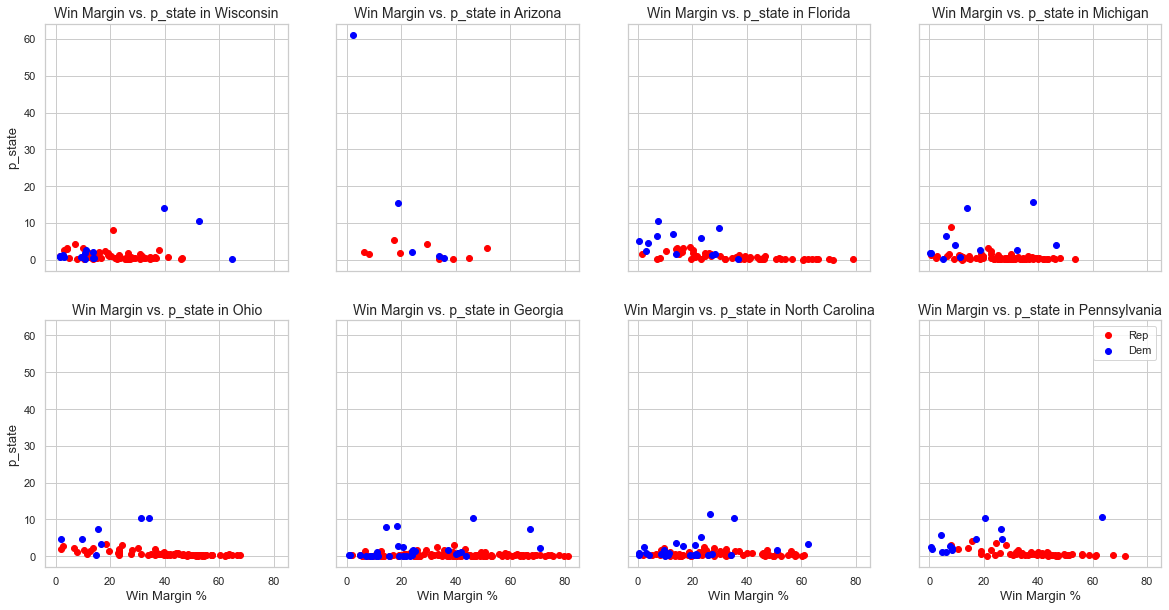

In [430]:
plt1 = ['Ohio', 'Wisconsin', 'Florida', 'North Carolina']
plt2 = ['Pennsylvania', 'Michigan', 'Georgia', 'Arizona']

fig, ax = plt.subplots(2,4,figsize=(20,10),sharex=True,sharey=True)
i = 0
j = 0 
for state in set(explore['state']):
    if j == 4:
        j = 0
        i +=1
    if i==2 and j==4:
        continue
    dfS = explore[(explore.state==state)&(explore.year==2020)]
    rep = dfS[dfS['party_won']=='Rep']
    dem = dfS[dfS['party_won']=='Dem']

    ax[i][j].scatter(rep['win_margin_percent'],rep['p_state'] , c = 'red',label='Rep')
    ax[i][j].scatter(dem['win_margin_percent'],dem['p_state'] , c = 'blue',label='Dem')
    if i ==1:
        ax[i][j].set_xlabel('Win Margin %', fontsize=13)
    if j == 0:
        ax[i][j].set_ylabel('p_state', fontsize=13)
    ax[i][j].set_title(f'Win Margin vs. p_state in {state}', fontsize=14)
    j+=1
plt.legend()
plt.savefig('margins1.png')

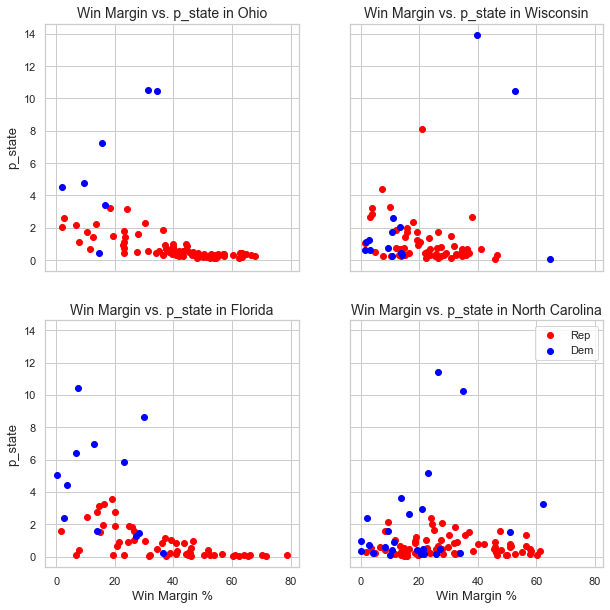

In [429]:
plt1 = ['Ohio', 'Wisconsin', 'Florida', 'North Carolina']
fig, ax = plt.subplots(2,2,figsize=(10,10),sharex=True, sharey=True)
i = 0
j = 0 
for state in plt1:
    if j == 2:
        j = 0
        i +=1
    dfS = explore[(explore.state==state)&(explore.year==2020)]
    rep = dfS[dfS['party_won']=='Rep']
    dem = dfS[dfS['party_won']=='Dem']

    ax[i][j].scatter(rep['win_margin_percent'],rep['p_state'] , c = 'red',label='Rep')
    ax[i][j].scatter(dem['win_margin_percent'],dem['p_state'] , c = 'blue',label='Dem')
    if i ==1:
        ax[i][j].set_xlabel('Win Margin %', fontsize=13)
    if j==0:
        ax[i][j].set_ylabel('p_state', fontsize=13)
    ax[i][j].set_title(f'Win Margin vs. p_state in {state}', fontsize=14)
    j+=1
plt.legend()